In [1]:
##############################################
import sys,os
import numpy as np
import pylab as py
##############################################
import pylab as py
from  matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format = 'retina' 
##############################################
PATH='../python/'  # path of the JAMLIB python folder
sys.path.append(PATH)  
from corelib import JAMLIB
##############################################
import lhapdf
##############################################

## Using JAMLIB interface

In [2]:
JAMffpi=JAMLIB(PATH+'JAM16/FFpion')
JAMffk=JAMLIB(PATH+'JAM16/FFkaon')

########################################################## 
                                                           
     _   _    __  __ _     ___ ____                        
    | | / \  |  \/  | |   |_ _| __ )                       
 _  | |/ _ \ | |\/| | |    | ||  _ \                       
| |_| / ___ \| |  | | |___ | || |_) |                      
 \___/_/   \_\_|  |_|_____|___|____/                       
                                                           
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
                                                           
Authors:                                                   
Nobuo Sato         (Jefferson Lab)                         
Jake Ethier        (College of William and Mary)           
Wally Melnitchouk  (Jefferson Lab)                         
Alberto Accardi    (Hampton University and Jefferson Lab)  
########################################################## 
loading JAM16/FFpion tables [100%]
#####

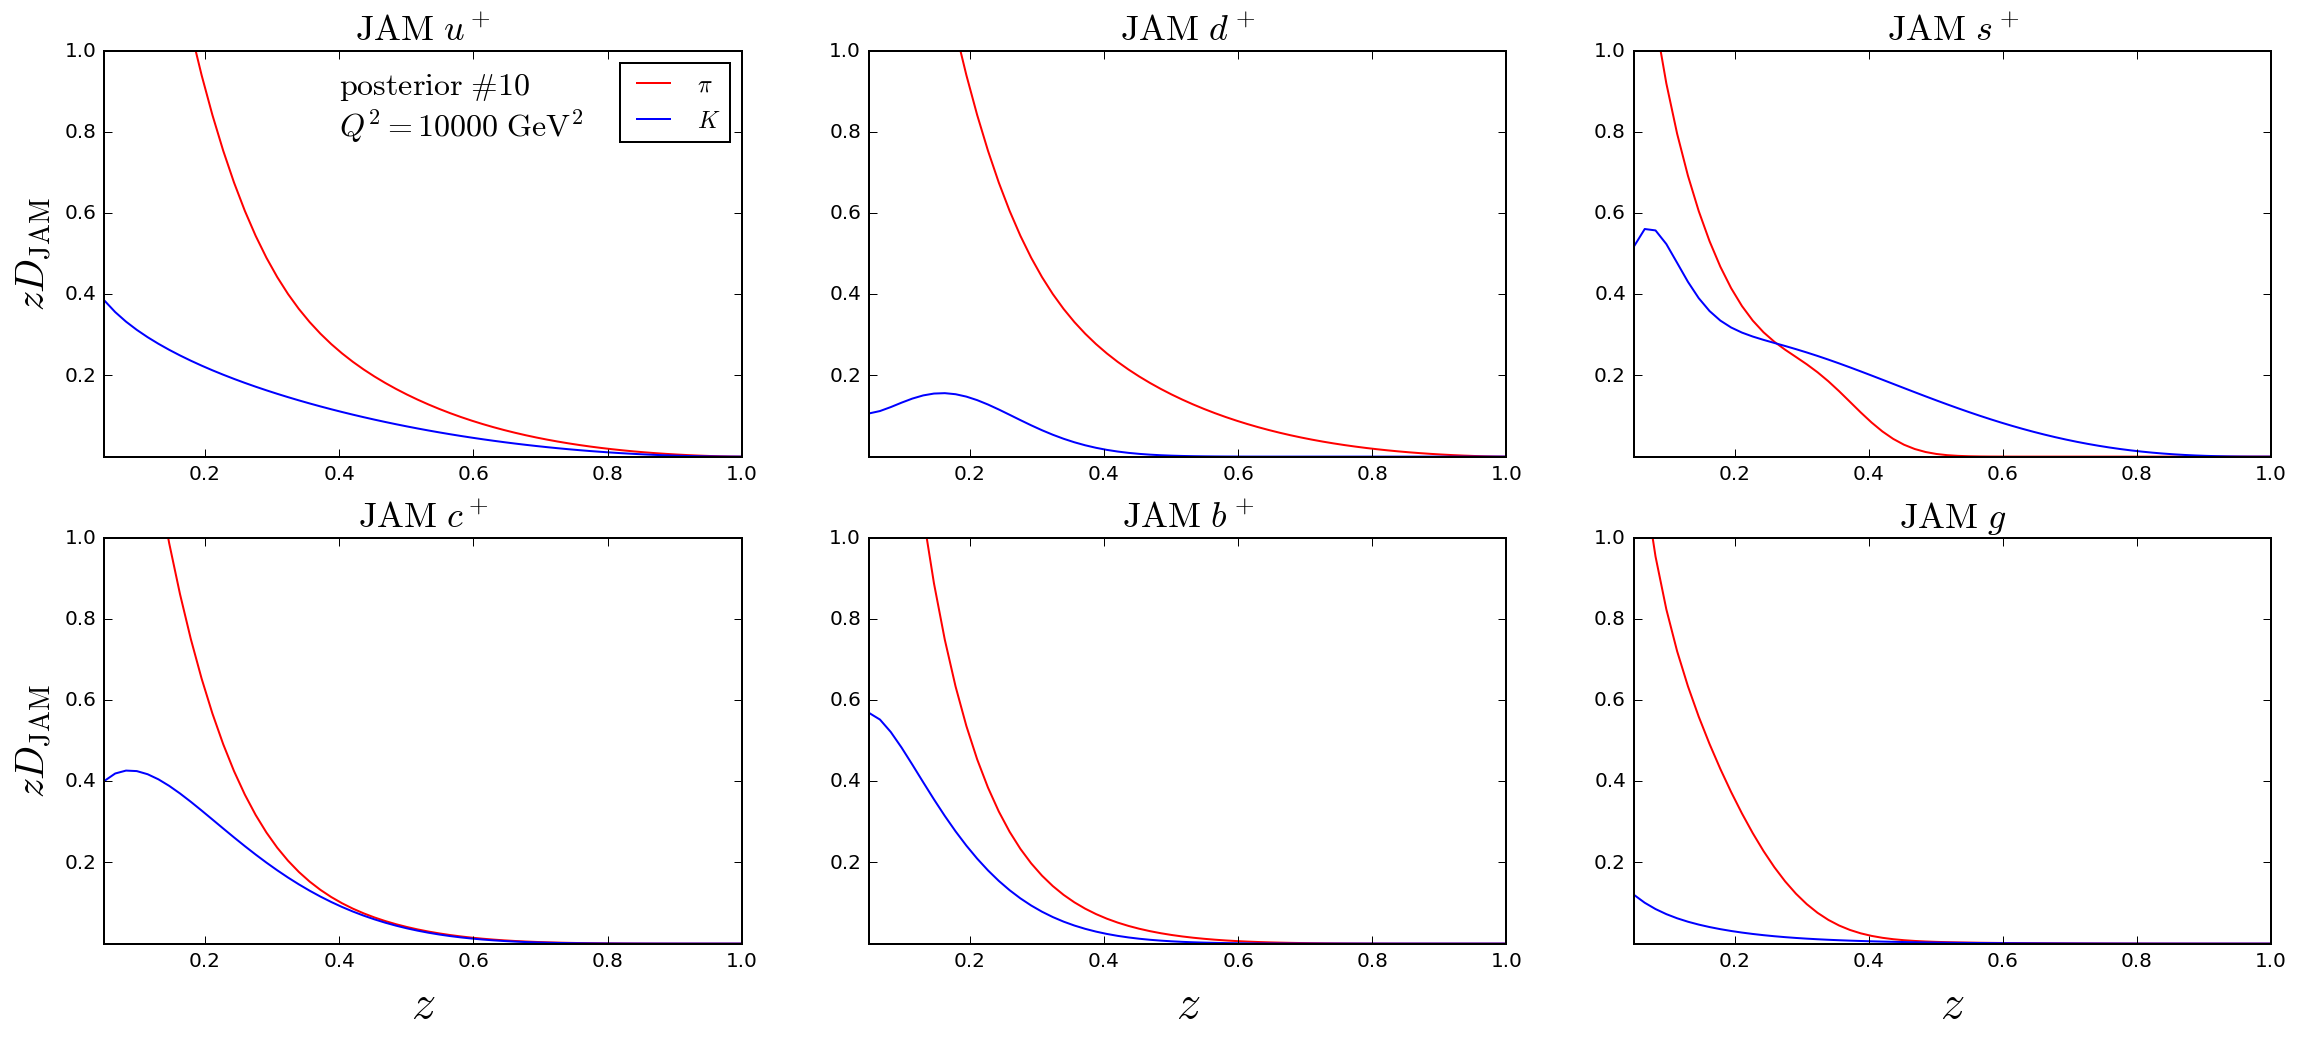

In [3]:
#Plot of JAM z*D(z,Q2) vs z 

post = 10
Q2 = 10000. #JAMffpi.mZ2 #1.17210230e+02
z = np.linspace(0.05,1,60)

zpi_JAM = []
zk_JAM = []
for f in ['up','dp','sp','cp','bp','g']:
  zpi_JAM.append([JAMffpi.get_XF(post,f,z[i],Q2) for i in range(len(z))])
  zk_JAM.append([JAMffk.get_XF(post,f,z[i],Q2) for i in range(len(z))])

nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))

plotlims = [0.05,1,1e-6,1.0]
plotscale = 'linear'

flavors = ['up','dp','sp','cp','bp','g']

cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(z,zpi_JAM[cnt-1],'r-',label='$\pi$')
  plt.plot(z,zk_JAM[cnt-1],'b-',label='$K$')
  plt.axis(plotlims)
  plt.yscale(plotscale)
  plt.title(r'${\rm JAM\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  if f in ['cp','bp','g']: 
    plt.xlabel('$z$', fontsize=24) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$zD_{\\rm JAM}$',fontsize=20*zoom/4) # Label y axis
  if f in ['up']: 
    if plotscale=='linear':
      xQ,yQ = 0.4,0.79
      yQp = 1.13*yQ
    elif plotscale=='log':
      xQ,yQ = 0.1,3e-6
      yQp = np.exp(0.88*np.log(yQ))
    plt.text(xQ,yQp,r'${\rm posterior\ \#%d}$'%post,fontsize=16*zoom/4)
    plt.text(xQ,yQ,r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16*zoom/4)
    plt.legend()

#plt.savefig('fig.JAM.%0.0f.png'%Q2)
plt.show()

## Using LHAPDF interface

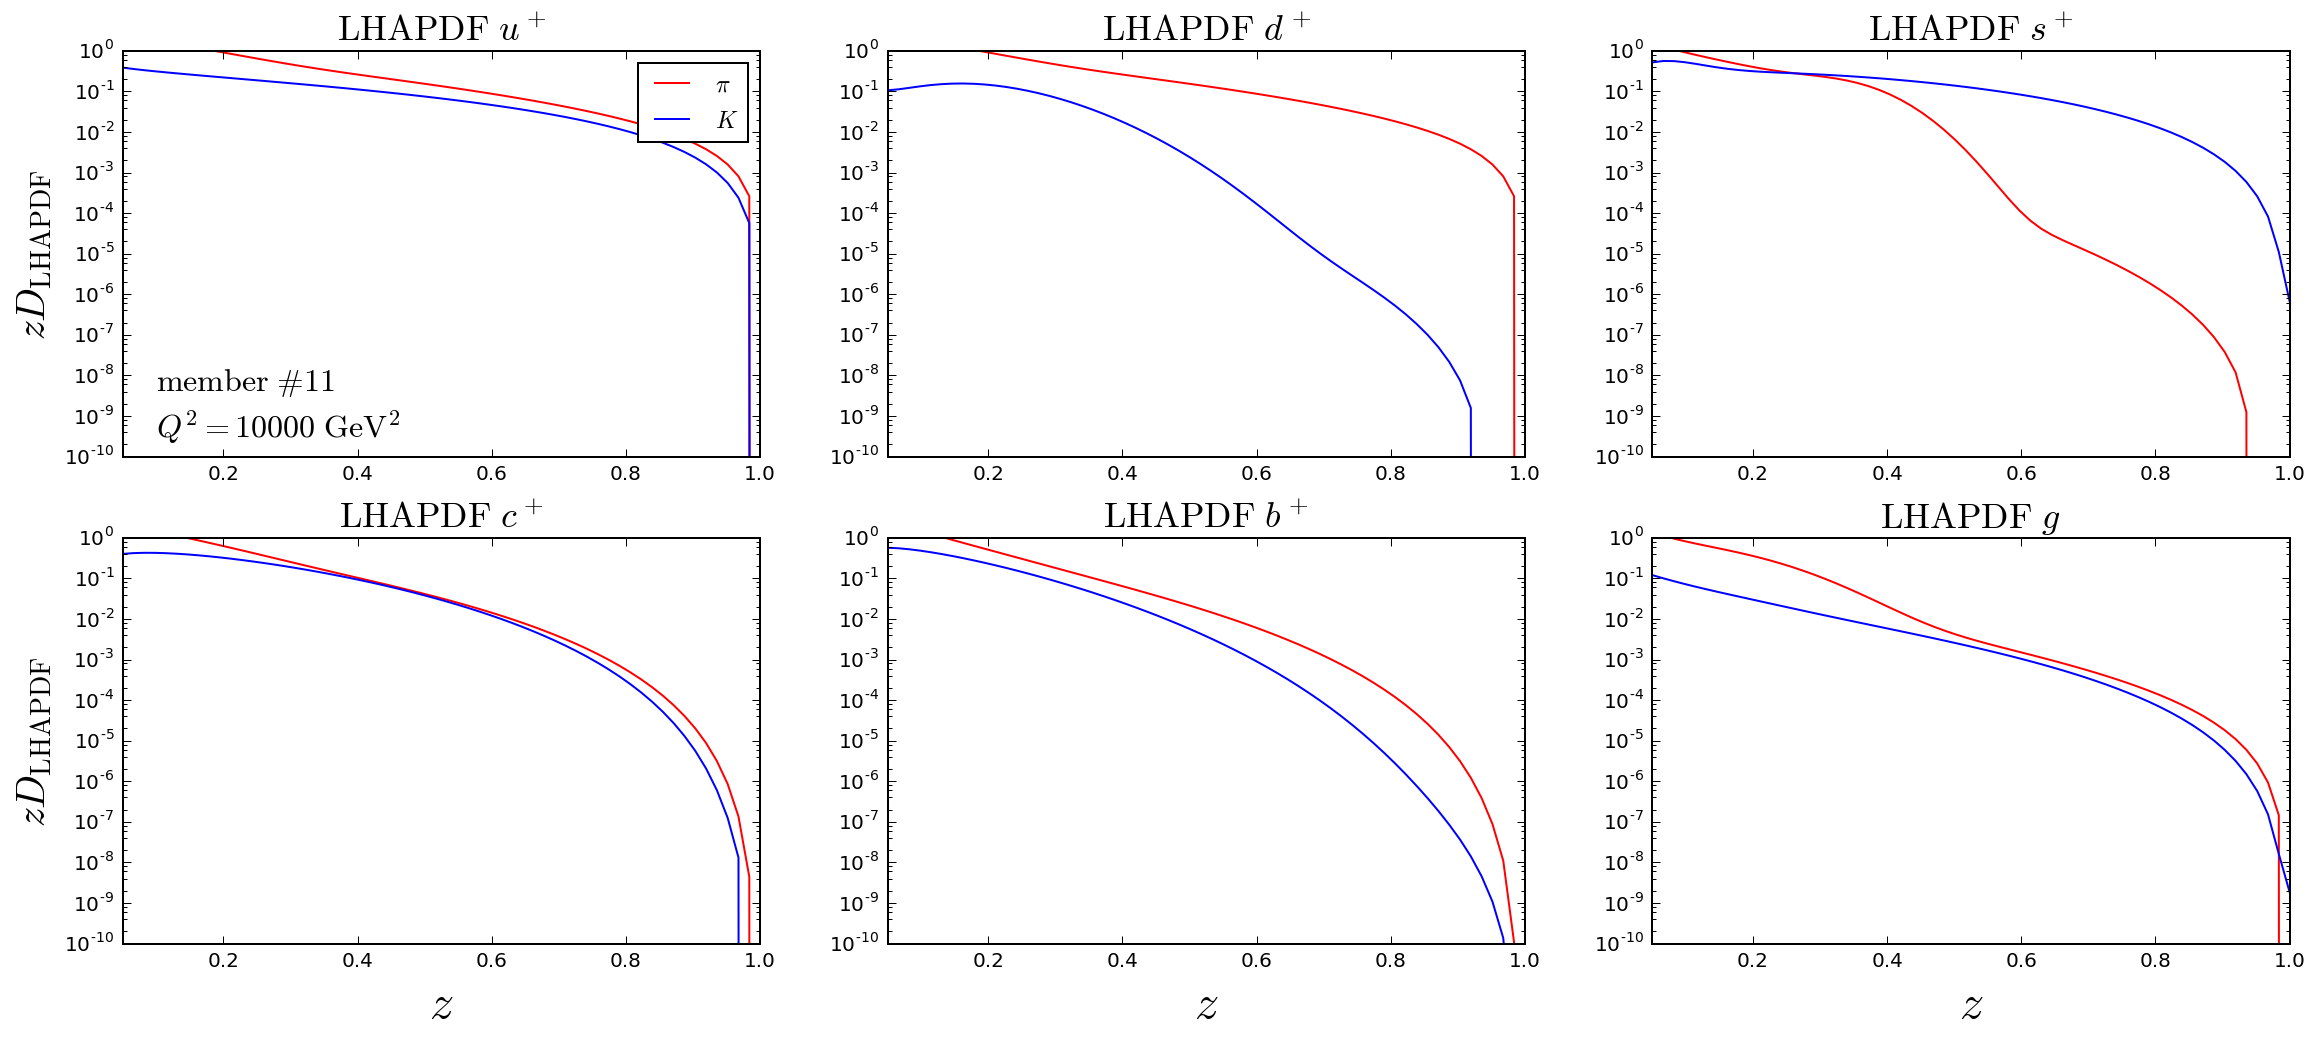

In [4]:
#Plot of JAM z*D(z,Q2) vs z 

member = post+1 # same posterior as JAM (member=0 is the average)
Q2lha=Q2 # (Uses same Q2 as JAM)
z = np.linspace(0.05,1,60)

lhapdfffpi = lhapdf.mkPDF("JAM16FF_pi_Ceven",member)
lhapdfffk = lhapdf.mkPDF("JAM16FF_K_Ceven",member)

zpi_lha = []
zk_lha = []
for f in [2,1,3,4,5,21]:
  zpi_lha.append([lhapdfffpi.xfxQ2(f,z[i],Q2lha) for i in range(len(z))])
  zk_lha.append([lhapdfffk.xfxQ2(f,z[i],Q2lha) for i in range(len(z))])
  

nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))

plotlims = [0.05,1,1e-10,1.0]
plotscale = 'log'

flavors = ['up','dp','sp','cp','bp','g']

cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(z,zpi_lha[cnt-1],'r-',label='$\pi$')
  plt.plot(z,zk_lha[cnt-1],'b-',label='$K$')
  plt.axis(plotlims)
  plt.yscale(plotscale)
  plt.title(r'${\rm LHAPDF\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  if f in ['cp','bp','g']: 
    plt.xlabel('$z$', fontsize=24) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$zD_{\\rm LHAPDF}$',fontsize=20*zoom/4) # Label y axis
  if f in ['up']: 
    if plotscale=='linear':
      xQ,yQ = 0.4,0.79
      yQp = 1.13*yQ
    elif plotscale=='log':
      xQ,yQ = 0.1,3*plotlims[2]
      yQp = np.exp(0.88*np.log(yQ))
    plt.text(xQ,yQp,r'${\rm member\ \#%d}$'%member,fontsize=16*zoom/4)
    plt.text(xQ,yQ,r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16*zoom/4)
    plt.legend()

#plt.savefig('fig.LHAPDF.%0.0f.png'%Q2)
plt.show()

## Ratios of LHAPDF / JAM interpolators

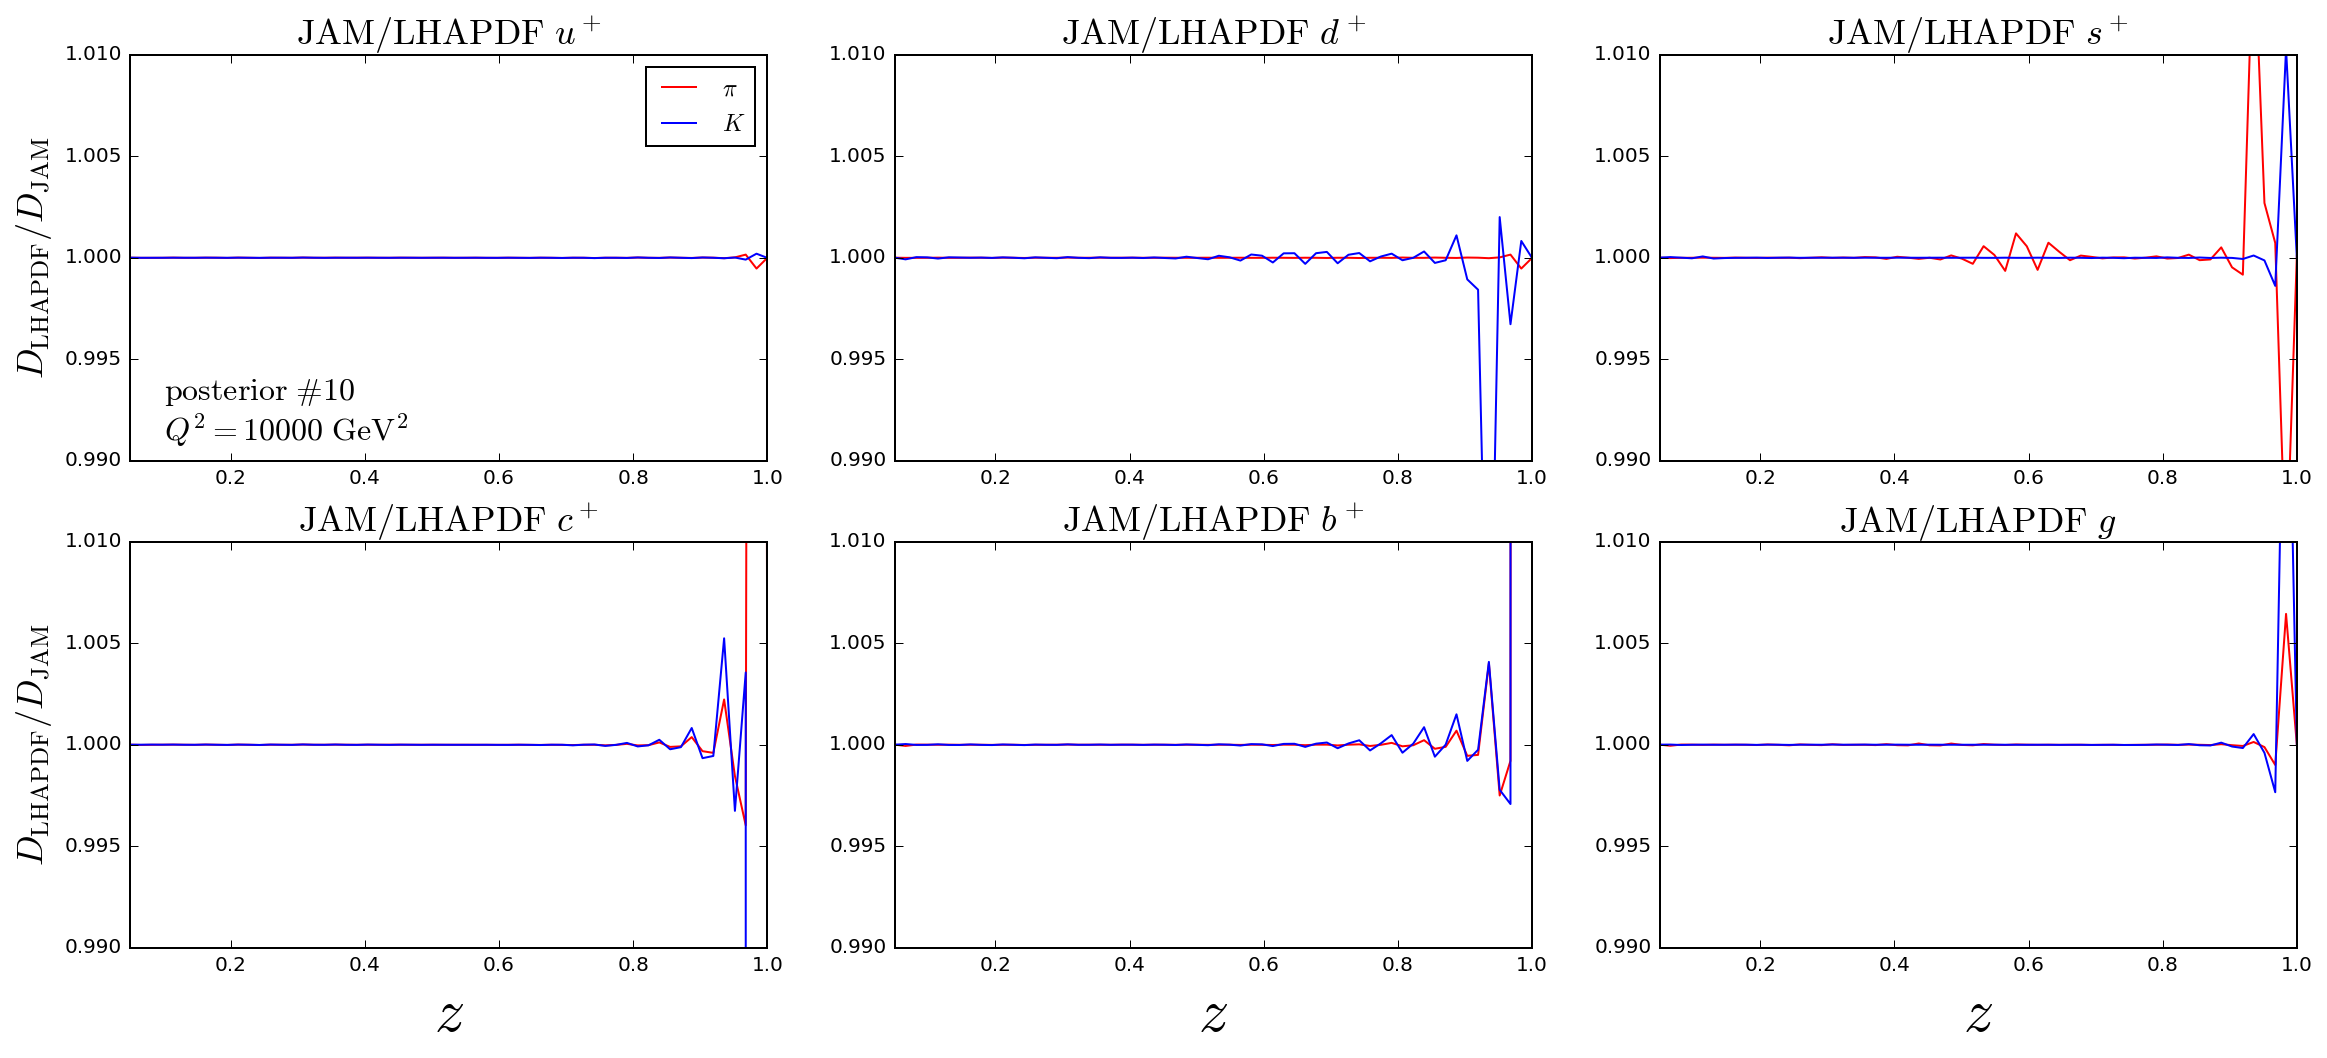

In [5]:
#Ratios JAM/lhapdf for u,d,s

rpi = []
rk = []
for f in [0,1,2,3,4,5]:
  rpi.append([zpi_JAM[f][i]/zpi_lha[f][i] for i in range(len(z))])
  rk.append([zk_JAM[f][i]/zk_lha[f][i] for i in range(len(z))])

nrow,ncol,zoom=2,3,4
fig = plt.figure(figsize=(zoom*ncol*1.618,zoom*nrow))
plotlims=[0.05,1,0.99,1.01]

flavors = ['up','dp','sp','cp','bp','g']

cnt=0
for f in flavors:  
  cnt+=1
  plt.subplot(2,3,cnt)
  plt.plot(z,rpi[cnt-1],'r-',label='$\pi$')
  plt.plot(z,rk[cnt-1],'b-',label='$K$')
  plt.title(r'${\rm JAM/LHAPDF\ } %s$'%f.replace('p','^+'),size=18*zoom/4)
  plt.axis(plotlims)
  if f in ['cp','bp','g']: 
    plt.xlabel('$z$', fontsize=30) #Label x axis
  if f in ['up','cp']: 
    plt.ylabel('$D_{\\rm LHAPDF}/D_{\\rm JAM}$',fontsize=18*zoom/4) # Label y axis
  if f in ['up']:
    rel=0.15*zoom/4
    plt.text(0.1,(1-rel)*plotlims[2]+rel*plotlims[3],r'${\rm posterior\ \#%d}$'%post,fontsize=16*zoom/4)
    rel=0.05
    plt.text(0.1,(1-rel)*plotlims[2]+rel*plotlims[3],r'$Q^2=%0.0f {\rm\ GeV}^2$'%Q2 ,fontsize=16)
    plt.legend()

#plt.savefig('fig.LHA_JAM.%0.0f.png'%Q2)
plt.show()

In [6]:
print JAMffpi.get_Q2grid()

[  1.00000000e+00   1.26384820e+00   1.59731228e+00   2.01876025e+00
   2.04490000e+00   2.55140652e+00   3.22459055e+00   4.07539297e+00
   5.15067808e+00   6.50967523e+00   8.22724134e+00   1.03979842e+01
   1.31414736e+01   1.66088278e+01   1.84900000e+01   2.09910372e+01
   2.65294846e+01   3.35292415e+01   4.23758716e+01   5.35566692e+01
   6.76875001e+01   8.55467254e+01   1.08118075e+02   1.36644835e+02
   1.72698329e+02   2.18264473e+02   2.75853162e+02   3.48636523e+02
   4.40623643e+02   5.56881399e+02   7.03813555e+02   8.89513497e+02
   1.12421004e+03   1.42083083e+03   1.79571449e+03   2.26951054e+03
   2.86831681e+03   3.62511705e+03   4.58159767e+03   5.79044398e+03
   7.31824222e+03   9.24914728e+03   1.16895182e+04   1.47737765e+04
   1.86718109e+04   2.35983347e+04   2.98247129e+04   2.98944100e+04
   3.76939098e+04   4.76393801e+04   6.02089449e+04   7.60949669e+04
   9.61724871e+04   1.21547425e+05   1.53617495e+05   1.94149195e+05
   2.45375111e+05   3.10116893e+05

In [7]:
print JAMffpi.get_Xgrid()

[ 0.05        0.05959596  0.06919192  0.07878788  0.08838384  0.0979798
  0.10757576  0.11717172  0.12676768  0.13636364  0.1459596   0.15555556
  0.16515152  0.17474747  0.18434343  0.19393939  0.20353535  0.21313131
  0.22272727  0.23232323  0.24191919  0.25151515  0.26111111  0.27070707
  0.28030303  0.28989899  0.29949495  0.30909091  0.31868687  0.32828283
  0.33787879  0.34747475  0.35707071  0.36666667  0.37626263  0.38585859
  0.39545455  0.40505051  0.41464646  0.42424242  0.43383838  0.44343434
  0.4530303   0.46262626  0.47222222  0.48181818  0.49141414  0.5010101
  0.51060606  0.52020202  0.52979798  0.53939394  0.5489899   0.55858586
  0.56818182  0.57777778  0.58737374  0.5969697   0.60656566  0.61616162
  0.62575758  0.63535354  0.64494949  0.65454545  0.66414141  0.67373737
  0.68333333  0.69292929  0.70252525  0.71212121  0.72171717  0.73131313
  0.74090909  0.75050505  0.76010101  0.76969697  0.77929293  0.78888889
  0.79848485  0.80808081  0.81767677  0.82727273  0.8